In [4]:
import numpy as np
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score, recall_score, precision_score,make_scorer
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import xgboost as xgb
#import lightgbm as lgb
from catboost import CatBoostClassifier
np.random.seed(25)
import os

In [5]:
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['font.size'] = 15

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [8]:
train.isnull().sum(axis=0)

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64

## Handling Null Values

In [9]:
train.fillna({"age": train["age"].median(), "trainee_engagement_rating": train["trainee_engagement_rating"].mode()[0]},inplace=True)
test.fillna({"age": test["age"].median(), "trainee_engagement_rating": test["trainee_engagement_rating"].mode()[0]},inplace=True)

## Data Visualization(Univariate)

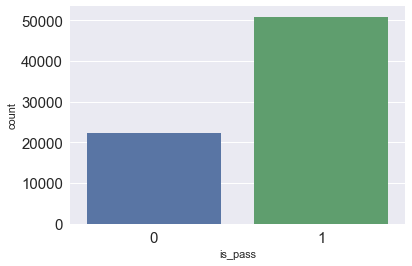

In [10]:
sns.countplot(train['is_pass'])

/Users/anuragsharma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


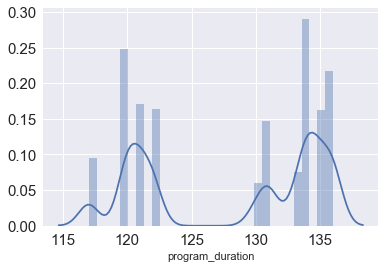

In [11]:
sns.distplot(train['program_duration'])

/Users/anuragsharma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


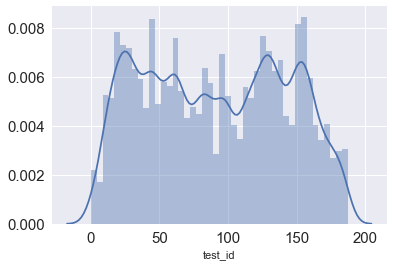

In [12]:
sns.distplot(train['test_id'])

/Users/anuragsharma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


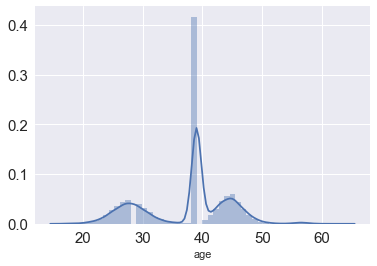

In [13]:
sns.distplot(train['age'])

/Users/anuragsharma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


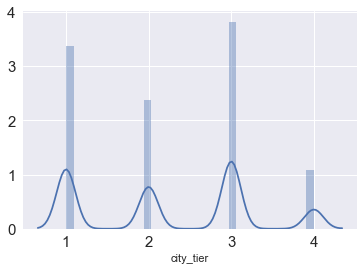

In [14]:
sns.distplot(train['city_tier'])

/Users/anuragsharma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


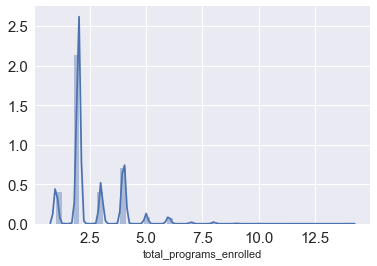

In [15]:
sns.distplot(train['total_programs_enrolled'])

/Users/anuragsharma/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


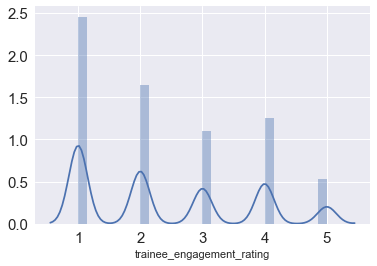

In [16]:
sns.distplot(train['trainee_engagement_rating'])

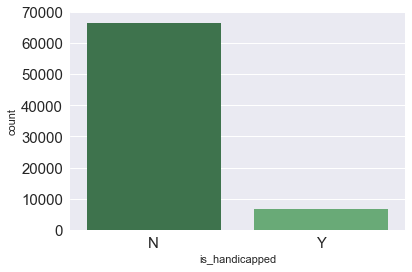

In [17]:
sns.countplot(x="is_handicapped", data=train, palette="Greens_d");

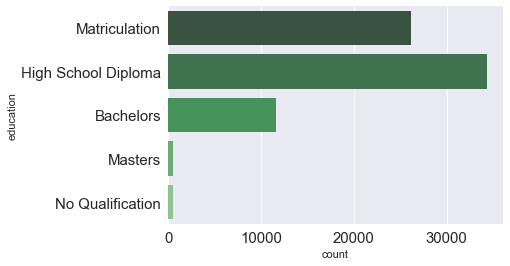

In [18]:
sns.countplot(y="education", data=train, palette="Greens_d");

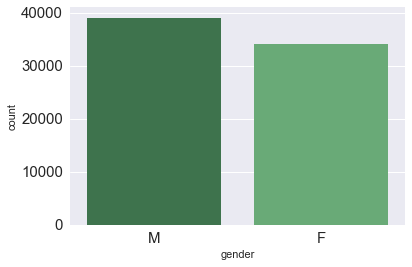

In [19]:
sns.countplot(x="gender", data=train, palette="Greens_d");

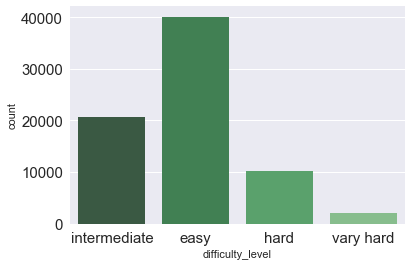

In [20]:
sns.countplot(x="difficulty_level", data=train, palette="Greens_d");

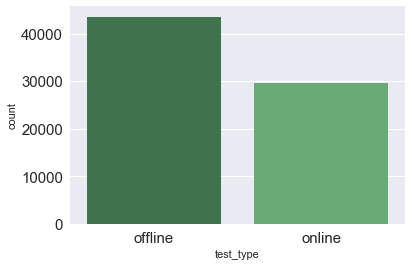

In [21]:
sns.countplot(x="test_type", data=train, palette="Greens_d");

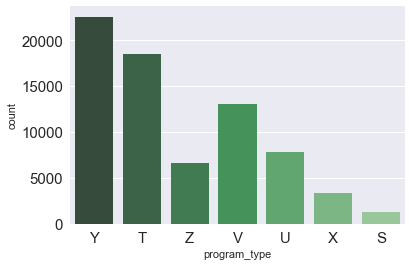

In [22]:
sns.countplot(x="program_type", data=train, palette="Greens_d");

## Data Visualization(Multi-variate)

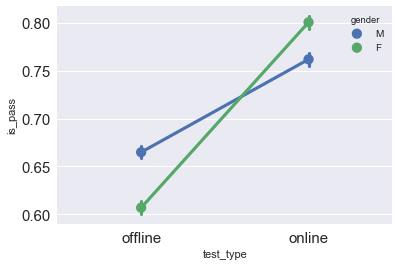

In [23]:
sns.pointplot(y="is_pass", x="test_type", hue="gender", data=train);

In **offline** exam, more **males** passed the exam than females but in **online** mode, **females** outshine males. 

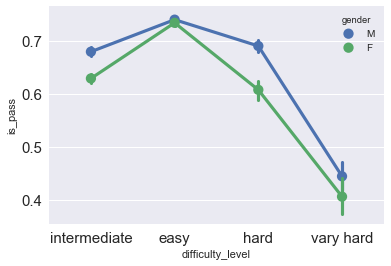

In [24]:
sns.pointplot(y="is_pass", x="difficulty_level", hue="gender", data=train);

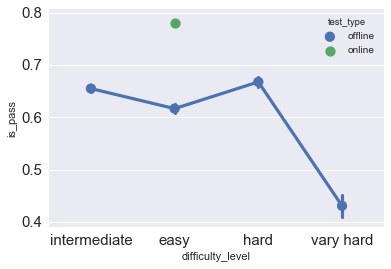

In [25]:
sns.pointplot(y="is_pass", x="difficulty_level", hue="test_type", data=train);

All **online** exams are **easy**.

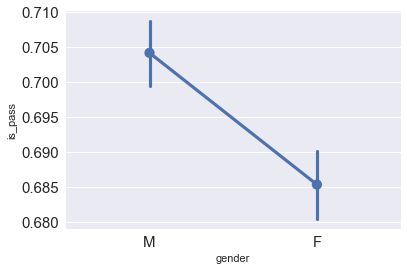

In [26]:
sns.pointplot(y="is_pass", x="gender",  data=train);

Overall **more males passed** the exam in comparison of females.

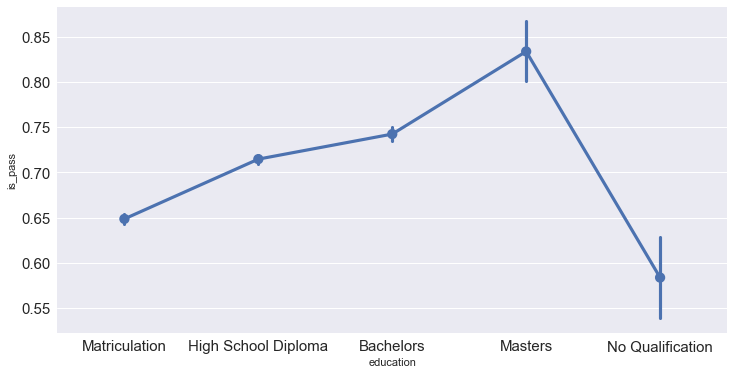

In [27]:
plt.figure(figsize=(12,6))
sns.pointplot(y="is_pass", x="education", data=train);

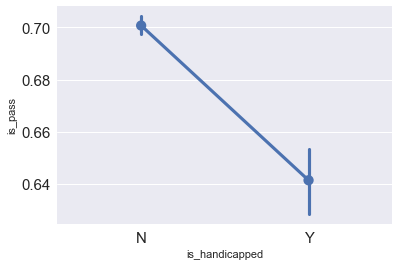

In [28]:
sns.pointplot(y="is_pass", x="is_handicapped", data=train);

In [29]:
train.dtypes

id                            object
program_id                    object
program_type                  object
program_duration               int64
test_id                        int64
test_type                     object
difficulty_level              object
trainee_id                     int64
gender                        object
education                     object
city_tier                      int64
age                          float64
total_programs_enrolled        int64
is_handicapped                object
trainee_engagement_rating    float64
is_pass                        int64
dtype: object

In [30]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

train['program_id'] = lb_make.fit_transform(train['program_id'])
train['program_type'] = lb_make.fit_transform(train['program_type'])
train['test_type'] = lb_make.fit_transform(train['test_type'])
train['difficulty_level'] = lb_make.fit_transform(train['difficulty_level'])
train['gender'] = lb_make.fit_transform(train['gender'])
train['education'] = lb_make.fit_transform(train['education'])
train['is_handicapped'] = lb_make.fit_transform(train['is_handicapped'])

test['program_id'] = lb_make.fit_transform(test['program_id'])
test['program_type'] = lb_make.fit_transform(test['program_type'])
test['test_type'] = lb_make.fit_transform(test['test_type'])
test['difficulty_level'] = lb_make.fit_transform(test['difficulty_level'])
test['gender'] = lb_make.fit_transform(test['gender'])
test['education'] = lb_make.fit_transform(test['education'])
test['is_handicapped'] = lb_make.fit_transform(test['is_handicapped'])

# train=pd.get_dummies(train)
# test=pd.get_dummies(test)

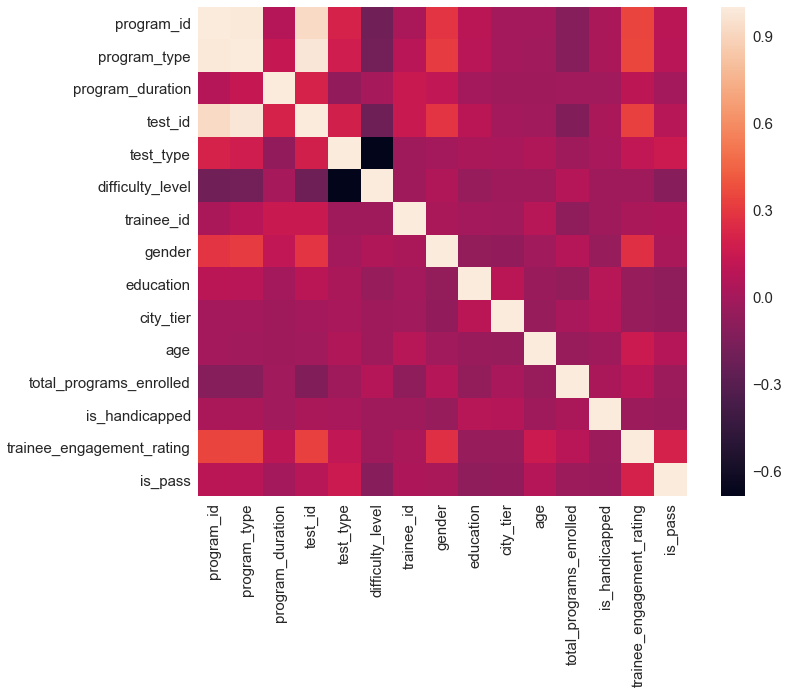

In [31]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

In [32]:
feature_names = [x for x in train.columns if x not in ['id', 'is_pass']]
target = train['is_pass']

## Modeling

In [34]:
vote_est = [
    ('cat1',CatBoostClassifier(depth=12, iterations=5000, learning_rate=0.1, eval_metric='AUC', random_seed=42,verbose=False)),
    ('ca2',CatBoostClassifier(depth=4, iterations=5000, learning_rate=0.1, eval_metric='AUC', random_seed=42,verbose=False)),
    ('cat3',CatBoostClassifier(depth=8, iterations=5000, learning_rate=0.1, eval_metric='AUC', random_seed=42,verbose=False))
]

model = VotingClassifier(estimators = vote_est , voting = 'soft')
## model training and prediction
model.fit(train[feature_names], target)
pred = model.predict_proba(test[feature_names])

In [ ]:
## make submission
sub = pd.DataFrame()
sub['id'] = test['id']
sub['is_pass'] = [i[1] for i in pred]
sub.to_csv('result.csv', index=False)

In [ ]:
sub.head()